### GRATED RECURREND UNIT ARCHITECTURE 

In [1]:
import pandas as pd
import numpy as np

In [2]:
Data = pd.read_csv('dataset.csv')
Data.fillna("",inplace=True)
Data.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,,,,,,,,,,,,,
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,,,,,,,,,,,,,,
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,,,,,,,,,,,,,,
3,Fungal infection,itching,skin_rash,dischromic _patches,,,,,,,,,,,,,,
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,,,,,,,,,,,,,,


In [3]:
Data.tail()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,,,,,,,,,,,
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,,,,,,,,,,,,,
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,,,,,,,,,,,,,
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,,,,,,,,,,,
4919,Impetigo,skin_rash,high_fever,blister,red_sore_around_nose,yellow_crust_ooze,,,,,,,,,,,,


In [5]:
for col in Data.columns[1:]:
    Data[col] = Data[col].astype(str)


In [6]:
Data['combined_symptoms'] = Data.iloc[:, 1:].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

In [8]:
Data = Data.drop(Data.columns[1:-1], axis=1)
Data.head()

,Disease,combined_symptoms
0,Fungal infection,itching skin_rash nodal_skin_eruptions disc...
1,Fungal infection,skin_rash nodal_skin_eruptions dischromic _...
2,Fungal infection,itching nodal_skin_eruptions dischromic _pat...
3,Fungal infection,itching skin_rash dischromic _patches ...
4,Fungal infection,itching skin_rash nodal_skin_eruptions ...


In [9]:
Data['combined_symptoms'] = Data['combined_symptoms'].str.replace('_', ' ')

In [11]:
Data['Disease'].value_counts()

Disease
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Aller

In [14]:
Data['combined_symptoms'] = Data['combined_symptoms'].apply(lambda x: x.lower() if pd.notna(x) else "")
Data.head()

,Disease,combined_symptoms
0,Fungal infection,itching skin rash nodal skin eruptions disc...
1,Fungal infection,skin rash nodal skin eruptions dischromic ...
2,Fungal infection,itching nodal skin eruptions dischromic pat...
3,Fungal infection,itching skin rash dischromic patches ...
4,Fungal infection,itching skin rash nodal skin eruptions ...


In [15]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
Data['Disease'] = label_encoder.fit_transform(Data['Disease'])

In [16]:
num_classes = len(label_encoder.classes_) 

In [17]:
x = Data['combined_symptoms']
y = Data['Disease']

In [18]:
from tensorflow.keras.utils import to_categorical

y = to_categorical(y, num_classes=num_classes)

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
max_words = 10000  
max_sequence_length = 100

In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)

In [22]:
x_train_sequences = tokenizer.texts_to_sequences(x_train)
x_test_sequences = tokenizer.texts_to_sequences(x_test)

In [23]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

x_train_padded = pad_sequences(x_train_sequences, maxlen=max_sequence_length)
x_test_padded = pad_sequences(x_test_sequences, maxlen=max_sequence_length)

In [24]:
embedding_dim = 100  
RNN_units = 128

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Dense

In [26]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(Bidirectional(GRU(units=RNN_units, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(units=num_classes, activation='softmax'))

In [27]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
from tensorflow.keras.callbacks import ModelCheckpoint

model_checkpoint = ModelCheckpoint('Predictor.h5', 
                                   monitor='accuracy', 
                                   save_best_only=True, 
                                   verbose=1,
                                   mode='max')

In [32]:
epochs = 10
batch_size = 32

In [33]:
model.fit(x_train_padded, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1,callbacks=[model_checkpoint])

Epoch 1/10
111/111 [==============================] - ETA: 0s - loss: 0.8658 - accuracy: 0.8967
Epoch 1: accuracy improved from -inf to 0.89667, saving model to Predictor.h5
111/111 [==============================] - 20s 177ms/step - loss: 0.8658 - accuracy: 0.8967 - val_loss: 0.1276 - val_accuracy: 0.9975
Epoch 2/10


C:\Users\nithi\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


111/111 [==============================] - ETA: 0s - loss: 0.0837 - accuracy: 0.9955
Epoch 2: accuracy improved from 0.89667 to 0.99548, saving model to Predictor.h5
111/111 [==============================] - 23s 210ms/step - loss: 0.0837 - accuracy: 0.9955 - val_loss: 0.0291 - val_accuracy: 1.0000
Epoch 3/10
111/111 [==============================] - ETA: 0s - loss: 0.0291 - accuracy: 0.9994
Epoch 3: accuracy improved from 0.99548 to 0.99944, saving model to Predictor.h5
111/111 [==============================] - 23s 211ms/step - loss: 0.0291 - accuracy: 0.9994 - val_loss: 0.0131 - val_accuracy: 1.0000
Epoch 4/10
111/111 [==============================] - ETA: 0s - loss: 0.0188 - accuracy: 0.9989
Epoch 4: accuracy did not improve from 0.99944
111/111 [==============================] - 22s 202ms/step - loss: 0.0188 - accuracy: 0.9989 - val_loss: 0.0080 - val_accuracy: 1.0000
Epoch 5/10
111/111 [==============================] - ETA: 0s - loss: 0.0098 - accuracy: 1.0000
Epoch 5: accurac

In [34]:
y_pred = model.predict(x_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

31/31 [==============================] - 1s 25ms/step


In [35]:
from sklearn.metrics import accuracy_score

AC = accuracy_score(y_pred_classes,y_true_classes)

print("THE ACCURACY SCORE OF GRATED RECURREND UNIT ARCHITECTURE IS :",AC*100)

THE ACCURACY SCORE OF GRATED RECURREND UNIT ARCHITECTURE IS : 100.0


In [36]:
from sklearn.metrics import hamming_loss

HL = hamming_loss(y_pred_classes,y_true_classes)

print("THE HAMMING LOSS OF GRATED RECURREND UNIT ARCHITECTURE IS :",HL*100)

THE HAMMING LOSS OF GRATED RECURREND UNIT ARCHITECTURE IS : 0.0


In [37]:
from sklearn.metrics import classification_report

CR = classification_report(y_pred_classes,y_true_classes)

print('THE PRECISION SCORE OF GRATED RECURREND UNIT ARCHITECTURE:\n\n\n',CR)

THE PRECISION SCORE OF GRATED RECURREND UNIT ARCHITECTURE:


               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        29
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        19
          16       

In [38]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_pred_classes,y_true_classes)

print('THE CONFUSION MATRIX SCORE OF GRATED RECURREND UNIT ARCHITECTURE:\n\n\n',CM)

THE CONFUSION MATRIX SCORE OF GRATED RECURREND UNIT ARCHITECTURE:


 [[18  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  0  0]
 [ 0  0  0 ...  0 22  0]
 [ 0  0  0 ...  0  0 34]]


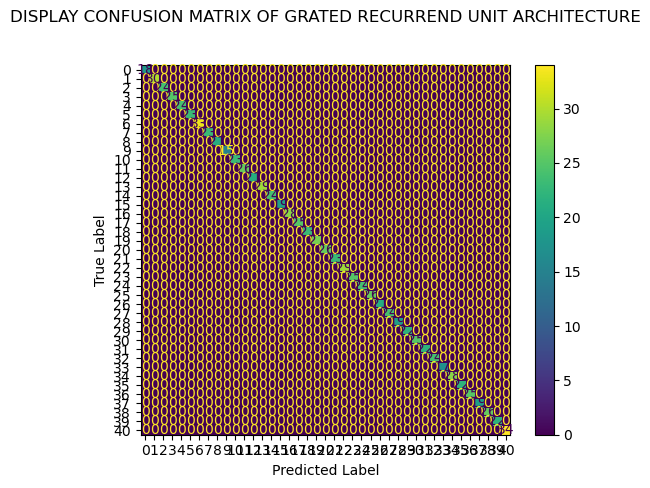

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true_classes, y_pred_classes)

classes = np.arange(cm.shape[0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='viridis', values_format='d')

plt.title('DISPLAY CONFUSION MATRIX OF GRATED RECURREND UNIT ARCHITECTURE\n\n')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


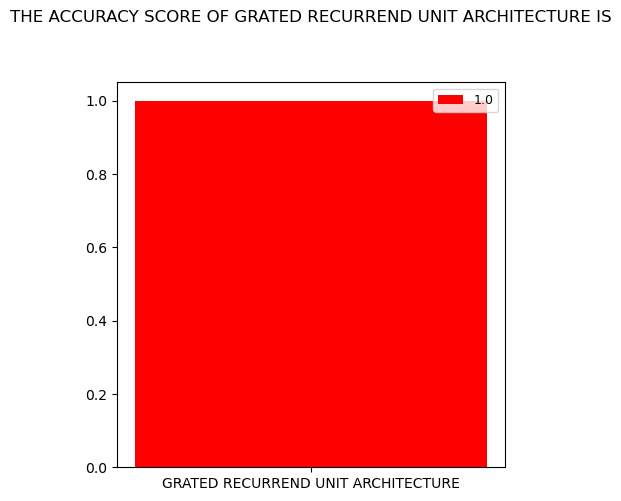

In [40]:
def graph():
    import matplotlib.pyplot as plt
    data=[AC]
    alg="GRATED RECURREND UNIT ARCHITECTURE"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("RED"))
    plt.title("THE ACCURACY SCORE OF GRATED RECURREND UNIT ARCHITECTURE IS\n\n\n")
    plt.legend(b,data,fontsize=9)
graph()